In [1]:
# this codes for using colaboratory
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# import os
# os.chdir("/content/drive/My Drive/Kuulab")
# !pwd

In [3]:

import warnings
warnings.filterwarnings("ignore")

# keras is a deep learning library under the tensorflow
import keras
import tensorflow as tf
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
# sklearn for machine learning and data processing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# numpy for numerical operators
from keras.optimizers import RMSprop
import numpy as np
import pandas as pd
# this package under this line for building a rbf layer
import rbflayer
import kmeans_initializer
# matplotlib for plotting graphs 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [4]:
#import firs data 
data=pd.read_csv("mushrooms.csv")
print(data.head())
print(data.shape())
data.isna().sum()


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:

df = data.copy()
#encoding for words to int
Lb = LabelEncoder()

for features in df.columns:
    df[features] = Lb.fit_transform(df[features])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
X00 = pd.DataFrame(df.drop(columns=['class'],axis=1)[:-100])
Y00 = np.array(df['class'][:-100])

In [7]:

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict,train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
x00, x_00_Validate, y00, y_00_Validate =train_test_split(preprocessing.minmax_scale(X00),(Y00.reshape((-1,1))), 
                                                    test_size=0.25)
y00=pd.DataFrame(y00)
x00=pd.DataFrame(x00)
print(y_00_Validate)
x00

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.666667,0.444444,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.000000,0.875,0.875,0.0,0.666667,0.5,0.0,0.250,0.6,0.166667
1,1.0,0.666667,0.888889,0.0,0.625,1.0,1.0,0.0,0.636364,1.0,...,0.000000,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.6,0.166667
2,0.4,0.000000,0.888889,0.0,0.625,1.0,1.0,0.0,0.636364,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667
3,0.6,0.666667,0.222222,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.333333,0.750,0.750,0.0,0.666667,0.5,0.0,0.875,0.8,0.666667
4,1.0,1.000000,0.333333,0.0,0.250,1.0,0.0,0.0,0.272727,0.0,...,0.333333,0.000,0.750,0.0,0.666667,0.5,0.5,0.125,0.8,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,1.0,0.000000,0.333333,1.0,0.625,1.0,0.0,0.0,0.454545,1.0,...,0.666667,0.750,0.750,0.0,0.666667,0.5,1.0,0.375,1.0,0.000000
6014,1.0,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.666667,0.750,0.750,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333
6015,0.0,0.000000,0.888889,0.0,0.625,1.0,1.0,0.0,0.181818,0.0,...,0.333333,0.875,0.875,0.0,0.666667,1.0,1.0,0.875,0.6,0.166667
6016,0.4,0.666667,0.444444,0.0,0.250,1.0,0.0,1.0,0.000000,1.0,...,0.333333,0.750,0.750,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333


In [9]:

kfold = KFold(n_splits = 2)
Histories=[]

In [29]:
for train_index, test_index in kfold.split(x00):
    #crossvalidation splitting
    X_train, X_test = x00.iloc[train_index], x00.iloc[test_index]
    Y_train, Y_test = y00.iloc[train_index], y00.iloc[test_index]
    
    #Model create
    rbfLayer = rbflayer.RBFLayer(10,
                    initializer=kmeans_initializer.InitCentersKMeans(x00),
                    betas=2.0,
                    input_shape=(X_train.shape[1],))
    

    xmodel = keras.models.Sequential()
    xmodel.add(rbfLayer)
    xmodel.add(Dense(3, activation='softmax'))
    xmodel.compile(loss='sparse_categorical_crossentropy',
                #'mean_squared_error',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = xmodel.fit(X_train, Y_train,
                epochs=50,
                batch_size=8,
                validation_data = (X_test, Y_test)
                )
    #classification report
    xmodel_score=xmodel.evaluate(X_test,Y_test,verbose=1)
    #PLOTTİNG
    print(xmodel_score)
    Histories.append(history)




Train on 3009 samples, validate on 3009 samples
Epoch 1/50
3009/3009 [==============================] - 1s 214us/step - loss: 0.9373 - accuracy: 0.5643 - val_loss: 0.7900 - val_accuracy: 0.7537
Epoch 2/50
3009/3009 [==============================] - 0s 163us/step - loss: 0.6690 - accuracy: 0.7733 - val_loss: 0.5599 - val_accuracy: 0.8830
Epoch 3/50
3009/3009 [==============================] - 0s 162us/step - loss: 0.4728 - accuracy: 0.8711 - val_loss: 0.3975 - val_accuracy: 0.8790
Epoch 4/50
3009/3009 [==============================] - 0s 163us/step - loss: 0.3480 - accuracy: 0.8764 - val_loss: 0.3120 - val_accuracy: 0.8833
Epoch 5/50
3009/3009 [==============================] - 0s 165us/step - loss: 0.2859 - accuracy: 0.8810 - val_loss: 0.2659 - val_accuracy: 0.8867
Epoch 6/50
3009/3009 [==============================] - 0s 165us/step - loss: 0.2482 - accuracy: 0.8820 - val_loss: 0.2338 - val_accuracy: 0.8870
Epoch 7/50
3009/3009 [==============================] - 0s 164us/step - loss

3009/3009 [==============================] - 1s 172us/step - loss: 0.3047 - accuracy: 0.8990 - val_loss: 0.2795 - val_accuracy: 0.8960
Epoch 6/50
3009/3009 [==============================] - 1s 172us/step - loss: 0.2605 - accuracy: 0.8996 - val_loss: 0.2457 - val_accuracy: 0.8966
Epoch 7/50
3009/3009 [==============================] - 1s 236us/step - loss: 0.2323 - accuracy: 0.9006 - val_loss: 0.2218 - val_accuracy: 0.8970
Epoch 8/50
3009/3009 [==============================] - 1s 173us/step - loss: 0.2111 - accuracy: 0.9016 - val_loss: 0.2041 - val_accuracy: 0.9043
Epoch 9/50
3009/3009 [==============================] - 1s 181us/step - loss: 0.1945 - accuracy: 0.9186 - val_loss: 0.1912 - val_accuracy: 0.9046
Epoch 10/50
3009/3009 [==============================] - 1s 181us/step - loss: 0.1810 - accuracy: 0.9279 - val_loss: 0.1770 - val_accuracy: 0.9256
Epoch 11/50
3009/3009 [==============================] - 1s 173us/step - loss: 0.1686 - accuracy: 0.9402 - val_loss: 0.1647 - val_accu

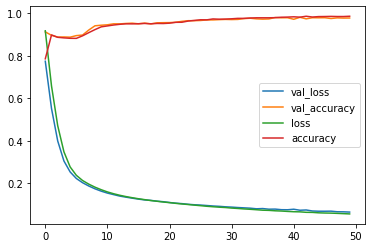

In [11]:
pd.DataFrame(Histories[0].history).plot()


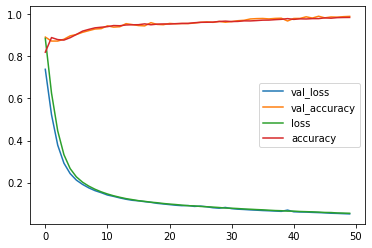

In [12]:
pd.DataFrame(Histories[1].history).plot()

In [13]:
winedf=pd.read_csv("winequality-red.csv")
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
wine_X = winedf.drop('quality',axis=1).copy()
wine_Y = np.array(winedf['quality'])


In [15]:
wine_x, wine_x_Validate, wine_y, wine_y_Validate =train_test_split(preprocessing.minmax_scale(wine_X),(wine_Y.reshape((-1,1))), 
                                                    test_size=0.25)
wine_x=pd.DataFrame(wine_x)
wine_y=pd.DataFrame(wine_y)

In [27]:
Wine_Histories=[]
for train_index, test_index in kfold.split(wine_x):
    #crossvalidation splitting
    X_train, X_test = wine_x.iloc[train_index], wine_x.iloc[test_index]
    Y_train, Y_test = wine_y.iloc[train_index], wine_y.iloc[test_index]
#     print(X_test)
#     print(Y_test)
    
    #Model create
    rbfLayer = rbflayer.RBFLayer(10,
                    initializer=kmeans_initializer.InitCentersKMeans(wine_x),
                    betas=2.0,
                    input_shape=(X_train.shape[1],))
    

    Wine_model = keras.models.Sequential()
    Wine_model.add(rbfLayer)
    Wine_model.add(Dense(9, activation='softmax'))
    Wine_model.compile(loss='sparse_categorical_crossentropy',
                #'mean_squared_error',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = Wine_model.fit(X_train, Y_train,
                epochs=50,
                batch_size=9,
                validation_data = (X_test, Y_test)
                )
    #classification report
    Wine_score=Wine_model.evaluate(X_test,Y_test,verbose=1)
    print(Wine_score)
    #PLOTTİNG
    Wine_Histories.append(history)




Train on 599 samples, validate on 600 samples
Epoch 1/50
599/599 [==============================] - 0s 397us/step - loss: 2.0964 - accuracy: 0.1569 - val_loss: 1.8089 - val_accuracy: 0.3817
Epoch 2/50
599/599 [==============================] - 0s 140us/step - loss: 1.6434 - accuracy: 0.3973 - val_loss: 1.4735 - val_accuracy: 0.3933
Epoch 3/50
599/599 [==============================] - 0s 137us/step - loss: 1.4147 - accuracy: 0.3990 - val_loss: 1.3039 - val_accuracy: 0.3900
Epoch 4/50
599/599 [==============================] - 0s 153us/step - loss: 1.3029 - accuracy: 0.4174 - val_loss: 1.2183 - val_accuracy: 0.4333
Epoch 5/50
599/599 [==============================] - 0s 150us/step - loss: 1.2457 - accuracy: 0.4908 - val_loss: 1.1740 - val_accuracy: 0.5550
Epoch 6/50
599/599 [==============================] - 0s 154us/step - loss: 1.2127 - accuracy: 0.5559 - val_loss: 1.1459 - val_accuracy: 0.5433
Epoch 7/50
599/599 [==============================] - 0s 148us/step - loss: 1.1898 - accur

600/600 [==============================] - 0s 138us/step - loss: 1.1390 - accuracy: 0.4883 - val_loss: 1.1830 - val_accuracy: 0.5025
Epoch 7/50
600/600 [==============================] - 0s 145us/step - loss: 1.1152 - accuracy: 0.5150 - val_loss: 1.1635 - val_accuracy: 0.5292
Epoch 8/50
600/600 [==============================] - 0s 135us/step - loss: 1.0985 - accuracy: 0.5433 - val_loss: 1.1494 - val_accuracy: 0.5342
Epoch 9/50
600/600 [==============================] - 0s 136us/step - loss: 1.0848 - accuracy: 0.5483 - val_loss: 1.1385 - val_accuracy: 0.5376
Epoch 10/50
600/600 [==============================] - 0s 140us/step - loss: 1.0742 - accuracy: 0.5467 - val_loss: 1.1295 - val_accuracy: 0.5376
Epoch 11/50
600/600 [==============================] - 0s 137us/step - loss: 1.0660 - accuracy: 0.5567 - val_loss: 1.1199 - val_accuracy: 0.5643
Epoch 12/50
600/600 [==============================] - 0s 139us/step - loss: 1.0580 - accuracy: 0.5633 - val_loss: 1.1134 - val_accuracy: 0.5643


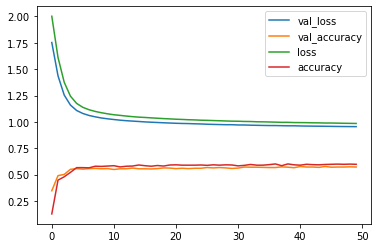

In [17]:
pd.DataFrame(Wine_Histories[0].history).plot()

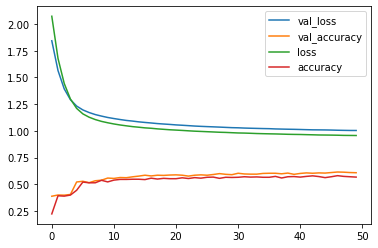

In [18]:
pd.DataFrame(Wine_Histories[1].history).plot()

In [20]:
shoppers_df=pd.read_csv("online_shoppers_intention.csv")
shoppers_df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,9,98.944444,1,600.0,124,5731.094444,0.018346,0.033718,1.914175,0.2,May,2,2,3,13,Returning_Visitor,False,False
1,9,98.266667,3,144.5,37,1630.137415,0.019565,0.038038,0.000000,0.0,Nov,3,2,7,3,Returning_Visitor,False,True
2,9,97.642857,0,0.0,37,584.595887,0.005128,0.013043,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,True,False
3,9,965.500000,0,0.0,30,1895.133333,0.005405,0.011186,0.000000,0.0,Dec,3,2,3,2,Returning_Visitor,True,False
4,9,96.186667,1,35.2,63,1345.136667,0.029167,0.053287,2.101850,0.0,Jul,2,2,9,13,Returning_Visitor,False,False


In [21]:
#import last dataset an preprocess data 
cancer_df=pd.read_csv("breast_cancer.csv")
cancer_df=cancer_df.drop(["id","Unnamed: 32"],axis=1)
print(cancer_df.isnull().sum())
cancer_df["diagnosis"].replace('M', 1 , inplace=True)
cancer_df["diagnosis"].replace('B', 0 , inplace=True)
cancer_Y=np.array(cancer_df["diagnosis"])
print("y",cancer_Y)

cancer_X=cancer_df.drop(["diagnosis"],axis=1)
print(cancer_X)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
y [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 

In [22]:
cancer_x, cancer_x_Validate, cancer_y, cancer_y_Validate =train_test_split(preprocessing.minmax_scale(cancer_X),(cancer_Y.reshape((-1,1))), 
                                                    test_size=0.25)
cancer_x=pd.DataFrame(cancer_x)
cancer_y=pd.DataFrame(cancer_y)

In [26]:
Cancer_Histories=[]
for train_index, test_index in kfold.split(cancer_x):
    #crossvalidation splitting
    X_train, X_test = cancer_x.iloc[train_index], cancer_x.iloc[test_index]
    Y_train, Y_test = cancer_y.iloc[train_index], cancer_y.iloc[test_index]
#     print(X_test)
#     print(Y_test)
    
    #Model create
    rbfLayer = rbflayer.RBFLayer(10,
                    initializer=kmeans_initializer.InitCentersKMeans(cancer_x),
                    betas=2.0,
                    input_shape=(X_train.shape[1],))
    

    Cancer_model = keras.models.Sequential()
    Cancer_model.add(rbfLayer)
    Cancer_model.add(Dense(2, activation='softmax'))
    Cancer_model.compile(loss='sparse_categorical_crossentropy',
                #'mean_squared_error',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = Cancer_model.fit(X_train, Y_train,
                epochs=50,
                batch_size=2,
                validation_data = (X_test, Y_test)
                )
    #classification report
    Cancer_score=Cancer_model.evaluate(X_test,Y_test,verbose=1)
    #PLOTTİNG
    print(Cancer_score)
    Cancer_Histories.append(history)

Train on 213 samples, validate on 213 samples
Epoch 1/50
213/213 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6526 - val_loss: 0.4995 - val_accuracy: 0.8122
Epoch 2/50
213/213 [==============================] - 0s 585us/step - loss: 0.4939 - accuracy: 0.7887 - val_loss: 0.4060 - val_accuracy: 0.8920
Epoch 3/50
213/213 [==============================] - 0s 581us/step - loss: 0.3943 - accuracy: 0.8732 - val_loss: 0.3381 - val_accuracy: 0.9343
Epoch 4/50
213/213 [==============================] - 0s 617us/step - loss: 0.3223 - accuracy: 0.9249 - val_loss: 0.2899 - val_accuracy: 0.9577
Epoch 5/50
213/213 [==============================] - 0s 630us/step - loss: 0.2712 - accuracy: 0.9437 - val_loss: 0.2544 - val_accuracy: 0.9531
Epoch 6/50
213/213 [==============================] - 0s 618us/step - loss: 0.2366 - accuracy: 0.9531 - val_loss: 0.2340 - val_accuracy: 0.9390
Epoch 7/50
213/213 [==============================] - 0s 616us/step - loss: 0.2138 - accurac

213/213 [==============================] - 0s 589us/step - loss: 0.2906 - accuracy: 0.9249 - val_loss: 0.2848 - val_accuracy: 0.9155
Epoch 7/50
213/213 [==============================] - 0s 578us/step - loss: 0.2605 - accuracy: 0.9390 - val_loss: 0.2595 - val_accuracy: 0.9155
Epoch 8/50
213/213 [==============================] - 0s 587us/step - loss: 0.2361 - accuracy: 0.9437 - val_loss: 0.2417 - val_accuracy: 0.9202
Epoch 9/50
213/213 [==============================] - 0s 590us/step - loss: 0.2168 - accuracy: 0.9437 - val_loss: 0.2207 - val_accuracy: 0.9249
Epoch 10/50
213/213 [==============================] - 0s 694us/step - loss: 0.1994 - accuracy: 0.9484 - val_loss: 0.2117 - val_accuracy: 0.9296
Epoch 11/50
213/213 [==============================] - 0s 644us/step - loss: 0.1874 - accuracy: 0.9531 - val_loss: 0.2054 - val_accuracy: 0.9296
Epoch 12/50
213/213 [==============================] - 0s 623us/step - loss: 0.1773 - accuracy: 0.9577 - val_loss: 0.1966 - val_accuracy: 0.9343


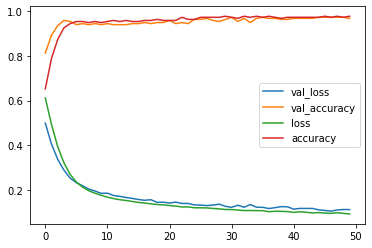

In [30]:
pd.DataFrame(Cancer_Histories[0].history).plot()

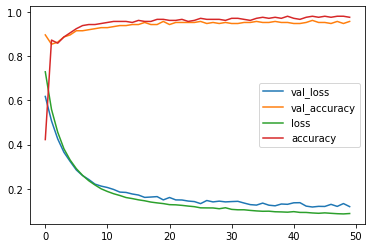

In [31]:
pd.DataFrame(Cancer_Histories[1].history).plot()